# Importando bibliotecas e dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
data = pd.read_csv('./joined_data.csv', na_values='failed')
data['tphl'] = pd.to_numeric(data['tphl'], errors = 'coerce')
data['tplh'] = pd.to_numeric(data['tplh'], errors = 'coerce')

In [3]:
data.dtypes

index          int64
nmos@var     float64
pmos@varp    float64
tphl         float64
tplh         float64
iint         float64
temper       float64
alter          int64
tensao       float64
dtype: object

In [4]:
data.head()

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao
0,1,0.5166,-0.4341,9.607000e-12,8.368000e-12,-1.330000e-15,-25.0,1,0.6
1,2,0.5064,-0.4523,9.424000e-12,8.791000e-12,-1.337000e-15,-25.0,1,0.6
2,3,0.4909,-0.4618,9.156000e-12,9.046000e-12,-1.388000e-15,-25.0,1,0.6
3,4,0.4882,-0.4667,9.111000e-12,9.161000e-12,-1.395000e-15,-25.0,1,0.6
4,5,0.5275,-0.4342,9.809000e-12,8.899000e-12,-1.351000e-15,-25.0,1,0.6


In [5]:
data.describe()

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao
count,168000.000000,168000.000000,168000.000000,1.550770e+05,1.550770e+05,1.680000e+05,168000.000000,168000.000000,168000.000000
mean,500.500000,0.509033,-0.450689,6.592126e-11,-6.440956e-10,-1.904696e-03,37.500000,4.000000,0.750000
std,288.675849,0.016785,0.015277,7.263116e-10,2.477490e-09,1.944617e-01,42.695755,2.000006,0.111804
min,1.000000,0.461300,-0.493300,-3.819000e-12,-1.000000e-08,-3.342370e+01,-25.000000,1.000000,0.600000
25%,250.750000,0.497775,-0.461900,9.825000e-12,7.604000e-12,-2.681000e-15,0.000000,2.000000,0.675000
50%,500.500000,0.508850,-0.450500,1.226000e-11,1.080000e-11,-1.713000e-15,37.500000,4.000000,0.750000
75%,750.250000,0.520125,-0.440300,1.476000e-11,1.874000e-11,-1.366000e-15,75.000000,6.000000,0.825000
max,1000.000000,0.586100,-0.405800,1.018000e-08,2.631000e-10,2.933300e+01,100.000000,7.000000,0.900000


# Limpando e Ajustando Dados

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(data.iint)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.006, p=0.000
Sample does not look Gaussian (reject H0)


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
data.loc[data.alter == 1, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 32e-9
data.loc[data.alter == 2, ['width_pmos', 'width_nmos', 'length_n&p']] = 70e-9, 70e-9, 32e-9
data.loc[data.alter == 3, ['width_pmos', 'width_nmos', 'length_n&p']] = 280e-9, 70e-9, 32e-9
data.loc[data.alter == 4, ['width_pmos', 'width_nmos', 'length_n&p']] = 350e-9, 70e-9, 32e-9
data.loc[data.alter == 5, ['width_pmos', 'width_nmos', 'length_n&p']] = 420e-9, 140e-9, 32e-9
data.loc[data.alter == 6, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 20e-9
data.loc[data.alter == 7, ['width_pmos', 'width_nmos', 'length_n&p']] = 140e-9, 70e-9, 40e-9
data.head()

,index,nmos@var,pmos@varp,tphl,tplh,iint,temper,alter,tensao,width_pmos,width_nmos,length_n&p
0,1,0.5166,-0.4341,9.607000e-12,8.368000e-12,-1.330000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
1,2,0.5064,-0.4523,9.424000e-12,8.791000e-12,-1.337000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
2,3,0.4909,-0.4618,9.156000e-12,9.046000e-12,-1.388000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
3,4,0.4882,-0.4667,9.111000e-12,9.161000e-12,-1.395000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08
4,5,0.5275,-0.4342,9.809000e-12,8.899000e-12,-1.351000e-15,-25.0,1,0.6,1.400000e-07,7.000000e-08,3.200000e-08


In [8]:
df = data.copy()

In [9]:
df = df.drop('alter',axis=1)
df = df.drop('index',axis=1)

In [10]:
print(df.shape)
df.isna().sum()

(168000, 10)


nmos@var          0
pmos@varp         0
tphl          12923
tplh          12923
iint              0
temper            0
tensao            0
width_pmos        0
width_nmos        0
length_n&p        0
dtype: int64

In [11]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
print(df.shape)
print(df.isna().sum())
df.describe()

(155077, 10)
nmos@var      0
pmos@varp     0
tphl          0
tplh          0
iint          0
temper        0
tensao        0
width_pmos    0
width_nmos    0
length_n&p    0
dtype: int64


,nmos@var,pmos@varp,tphl,tplh,iint,temper,tensao,width_pmos,width_nmos,length_n&p
count,155077.000000,155077.000000,1.550770e+05,1.550770e+05,1.550770e+05,155077.000000,155077.000000,1.550770e+05,1.550770e+05,1.550770e+05
mean,0.509108,-0.450684,6.592126e-11,-6.440956e-10,-2.063419e-03,37.467033,0.750069,2.266666e-07,8.083333e-08,3.238095e-08
std,0.016825,0.015274,7.263116e-10,2.477490e-09,2.024013e-01,42.982289,0.111693,1.234463e-07,2.531751e-08,4.477225e-09
min,0.461300,-0.493300,-3.819000e-12,-1.000000e-08,-3.342370e+01,-25.000000,0.600000,7.000000e-08,7.000000e-08,2.000000e-08
25%,0.497800,-0.461900,9.825000e-12,7.604000e-12,-2.351000e-15,0.000000,0.700000,1.400000e-07,7.000000e-08,3.200000e-08
50%,0.509000,-0.450500,1.226000e-11,1.080000e-11,-1.657000e-15,50.000000,0.800000,1.400000e-07,7.000000e-08,3.200000e-08
75%,0.520200,-0.440300,1.476000e-11,1.874000e-11,-1.336000e-15,75.000000,0.800000,3.500000e-07,7.000000e-08,3.200000e-08
max,0.586100,-0.405800,1.018000e-08,2.631000e-10,2.933300e+01,100.000000,0.900000,4.200000e-07,1.400000e-07,4.000000e-08


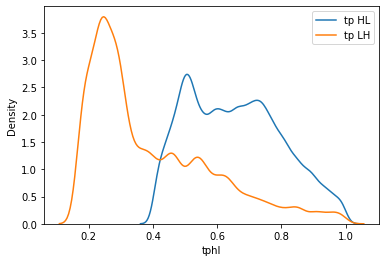

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117971 entries, 0 to 167999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   nmos@var    117971 non-null  float64
 1   pmos@varp   117971 non-null  float64
 2   tphl        117971 non-null  float64
 3   tplh        117971 non-null  float64
 4   iint        117971 non-null  float64
 5   temper      117971 non-null  float64
 6   tensao      117971 non-null  float64
 7   width_pmos  117971 non-null  float64
 8   width_nmos  117971 non-null  float64
 9   length_n&p  117971 non-null  float64
dtypes: float64(10)
memory usage: 9.9 MB
None


In [75]:
labels = ['tphl', 'tplh']

# removendo valores negativos
df_ = df.loc[(df['tplh'] > 0),:]
df_ = df_.loc[(df['tphl'] > 0),:]

# Selecionando [5,95%] dos dados somente
df_ = df_[df_['tphl'] <= np.percentile(df_['tphl'],95)]
df_ = df_[df_['tphl'] >= np.percentile(df_['tphl'],5)]
df_ = df_[df_['tplh'] <= np.percentile(df_['tplh'],95)]
df_ = df_[df_['tplh'] >= np.percentile(df_['tplh'],5)]


# setando X e y
X = df_.drop(labels, axis = 1)
# ajustando y para ficar entre 0 e 1
y_hl = df_['tphl']/df_['tphl'].max()
y_lh = df_['tplh']/df_['tplh'].max()

sns.kdeplot(y_hl, label = 'tp HL')
sns.kdeplot(y_lh, label = 'tp LH')
plt.legend()
plt.show()


label: tp LH
clf: DecisionTreeRegressor, mse: 4.0138878662145444e-05
clf: LinearRegression, mse: 0.007230572570239273
label: tp HL
clf: DecisionTreeRegressor, mse: 9.731879760999055e-06
clf: LinearRegression, mse: 0.005092834883229996


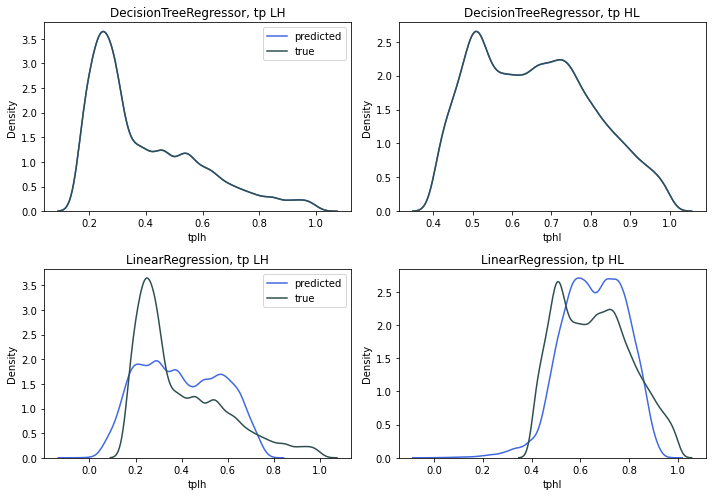

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

clfs = [DecisionTreeRegressor(), LinearRegression()]
Xtr, Xte, ytr, yte = train_test_split(X, y_lh)
scaler = StandardScaler().fit(Xtr)
Xtr_sc = scaler.transform(Xtr)
Xte_sc = scaler.transform(Xte)

fig, ax = plt.subplots(2,2, figsize = (10,7))
print('label: tp LH')
for idx,clf in enumerate(clfs):
    i = idx
    
    clf = clf.fit(Xtr_sc, ytr)
    ypred = clf.predict(Xte_sc)
    mse = mean_squared_error(yte, ypred)
    print(f'clf: {clf.__class__.__name__}, mse: {mse}')
        
    sns.kdeplot(ypred, label = 'predicted', ax = ax[i][0], color = 'royalblue')
    sns.kdeplot(yte, label = 'true', ax = ax[i][0], color = 'darkslategray')
    
    ax[i][0].legend()
    ax[i][0].set_title(f'{clf.__class__.__name__}, tp LH')

Xtr, Xte, ytr, yte = train_test_split(X, y_hl)
scaler = StandardScaler().fit(Xtr)
Xtr_sc = scaler.transform(Xtr)
Xte_sc = scaler.transform(Xte)

print('label: tp HL')
for idx,clf in enumerate(clfs):
    i = idx
    
    clf = clf.fit(Xtr_sc, ytr)
    ypred = clf.predict(Xte_sc)
    mse = mean_squared_error(yte, ypred)
    print(f'clf: {clf.__class__.__name__}, mse: {mse}')
        
    sns.kdeplot(ypred, label = 'predicted', ax = ax[i][1],color = 'royalblue')
    sns.kdeplot(yte, label = 'true', ax = ax[i][1], color = 'darkslategray')
    ax[i][1].set_title(f'{clf.__class__.__name__}, tp HL')

plt.tight_layout()
plt.show()

